# Example Multiband Pipeline

Here is an example preprocessing pipeline for multiband data. It uses [nipype](http://nipy.org/nipype/) and tools from [SPM12](http://www.fil.ion.ucl.ac.uk/spm/software/spm12/) and [FSL](http://fsl.fmrib.ox.ac.uk/). Make sure that fsl, matlab, dcm2nii are on your unix environment path. It might be helpful to create a symbolic link somewhere common like /usr/local/bin. This pipeline can be run on a cluster see [nipype workflow documentation](http://nipy.org/nipype/users/plugins.html). The nipype folder is quite large due to matlab's need for unzipped .nii files. It can be deleted if space is an issue.

- Uses Chris Rorden's [dcm2nii](http://www.mccauslandcenter.sc.edu/mricro/mricron/dcm2nii.html) to convert dcm to nii
- Uses Nipy's Trim to remove the first 10 volumes (i.e., disdaqs)
- Uses FSL's [topup](http://fsl.fmrib.ox.ac.uk/fsl/fslwiki/TOPUP) to perform distortion correction. Default is AP (need to switch order of concatentation if PA is needed)
- Uses SPM12 realignment to mean
- Uses SPM12 to coregister functional to structural
- Uses SPM12 new nonlinear normalization routine
- Uses SPM12 smoothing with 6mm fwhm as default
- Uses [Artifact Detection Toolbox](http://www.nitrc.org/projects/artifact_detect/) to detect scanner spikes.
- Uses Nipype Datasink to write out key files to new output directory under subject name
- Will create a quick montage to check normalization
- Will output a plot of realignment parameters
- Will output a covariate csv file with 24 parameter centered motion parameters, their squares, and the 12 derivatives (6 motion + 6 squared motion).

Here is an example script:

In [ ]:
from cosanlab_preproc.pipelines import Couple_Preproc_Pipeline
import os

base_dir = '/Users/lukechang/Dropbox/Couple_Conflict/Data/Scanner'
spm_path = '/Users/lukechang/Resources/spm12/'
output_dir = '/Users/lukechang/Dropbox/Couple_Conflict/Data/Imaging'

# Get Subject ID
subject_list = os.listdir(os.path.join(base_dir))
subject_id = subject_list[1]

#Run Pipeline
wf = Couple_Preproc_Pipeline(base_dir=base_dir, output_dir=output_dir, subject_id=subject_id, spm_path=spm_path)
# wf.run('MultiProc', plugin_args={'n_procs': 8}) # This command runs the pipeline in parallel (using 8 cores)
wf.write_graph(dotfilename=os.path.join(output_dir,'Workflow_Pipeline.dot'),format='png')
wf.run()

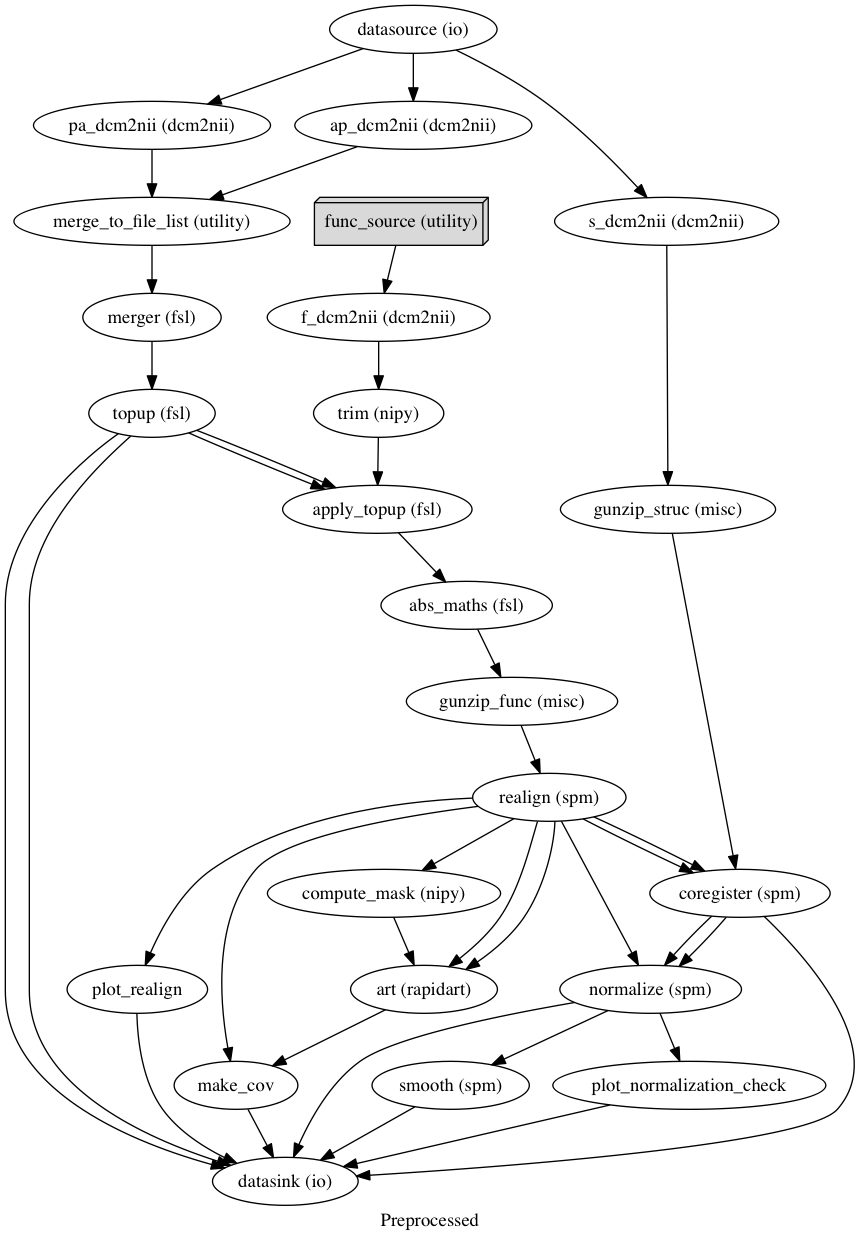

In [12]:
from IPython.display import Image
Image("../../img/Workflow_Pipeline_dot.png")